In [1]:
# 코랩에서는 다음 코드로 베타버전을 설치한다.
!pip install tensorflow-gpu==2.0.0-rc
!apt install -y -q fonts-nanum

Reading package lists...
Building dependency tree...
Reading state information...
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.


# 오토인코더

오토인코더(autoencoder1)는 입력 데이터 그 자체를 예측 목표(target)로 하는 학습 방법이다. 히든 레이터의 변수를 입력 차원보다 작게 놓으면 압축(compression) 또는 차원 감소(dimension reduction) 효과를 가진다.

<img src="https://datascienceschool.net/upfiles/aed3c00ec2554dceb3b6558e778612cb.jpeg" width="100%">

In [0]:
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

import tensorflow
from tensorflow.keras.datasets import mnist
import numpy as np

(x_train_2d, _), (_, _) = mnist.load_data()
x_train_2d = x_train_2d.astype(np.float32) / 255.0
x_train = x_train_2d.reshape(60000, 784) 

In [3]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential

autoencoder1 = Sequential()
autoencoder1.add(Dense(32, input_dim=784, activation='relu'))
autoencoder1.add(Dense(784, activation='sigmoid'))
autoencoder1.compile(optimizer="adam", loss="binary_crossentropy")

autoencoder1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [4]:
%%time
history = autoencoder1.fit(x_train, x_train, epochs=50, batch_size=256, verbose=0)

CPU times: user 1min, sys: 6.55 s, total: 1min 7s
Wall time: 48.3 s


In [0]:
import matplotlib as mpl
import matplotlib.pylab as plt

mpl.rc('font', family='NanumGothic')
mpl.rc('axes', unicode_minus=False)
mpl.rc('figure', dpi=300)

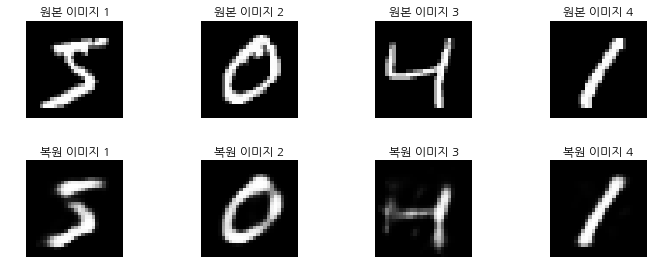

In [6]:
%matplotlib inline

n = 4
x_train_recoverd = autoencoder1.predict(x_train[:n, :])
plt.figure(figsize=(10, 4))
for i in range(n):
    plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i, :].reshape(28, 28))
    plt.title("원본 이미지 {}".format(i + 1))
    plt.gray(); plt.axis("off")
    
    plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_train_recoverd[i, :].reshape(28, 28))
    plt.title("복원 이미지 {}".format(i + 1))
    plt.gray(); plt.axis("off")

plt.tight_layout()
plt.show()

In [0]:
from tensorflow.keras.models import Model

encoder = Model(autoencoder1.input, autoencoder1.layers[0].output)

In [8]:
encoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_input (InputLayer)     [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [0]:
from tensorflow.keras.layers import Input

input_decoder = Input(shape=(32,))
decoder = Model(input_decoder, autoencoder1.layers[1](input_decoder))

In [10]:
decoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32)]              0         
_________________________________________________________________
dense_1 (Dense)              (None, 784)               25872     
Total params: 25,872
Trainable params: 25,872
Non-trainable params: 0
_________________________________________________________________


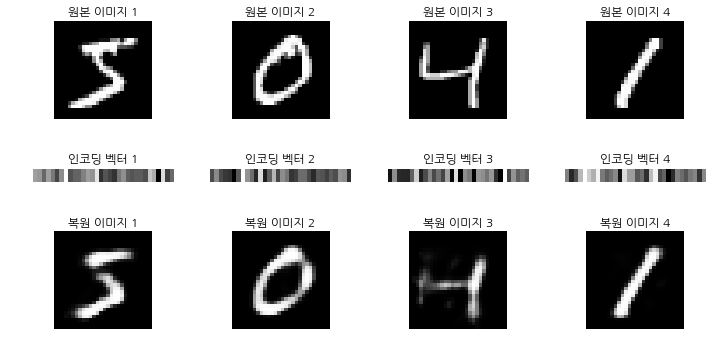

In [11]:
n = 4
x_train_encoded = encoder.predict(x_train[:n, :])
x_train_recoverd = decoder.predict(x_train_encoded)

plt.figure(figsize=(10, 5))
for i in range(n):
    plt.subplot(3, n, i + 1)
    plt.imshow(x_train[i, :].reshape(28, 28))
    plt.title("원본 이미지 {}".format(i + 1))
    plt.gray(); plt.axis("off")
    
    plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_train_encoded[i].reshape(1, 32), aspect=3)
    plt.title("인코딩 벡터 {}".format(i + 1))
    plt.axis("off")
    
    plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(x_train_recoverd[i, :].reshape(28, 28))
    plt.title("복원 이미지 {}".format(i + 1))
    plt.gray(); plt.axis("off")

plt.tight_layout()
plt.show()

## 다층 오토인코더

In [0]:
autoencoder2 = Sequential()
autoencoder2.add(Dense(128, input_dim=784, activation='relu'))
autoencoder2.add(Dense(64, activation='relu'))
autoencoder2.add(Dense(32, activation='relu'))
autoencoder2.add(Dense(64, activation='relu'))
autoencoder2.add(Dense(128, activation='relu'))
autoencoder2.add(Dense(784, activation='sigmoid'))
autoencoder2.compile(optimizer="adam", loss="binary_crossentropy")

In [13]:
%%time
history = autoencoder2.fit(x_train, x_train, epochs=100, batch_size=256, verbose=0)

CPU times: user 2min 21s, sys: 18.6 s, total: 2min 40s
Wall time: 2min 4s


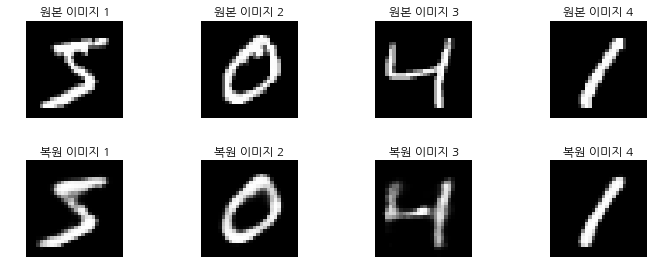

In [14]:
n = 4
x_train_recoverd = autoencoder2.predict(x_train[:n, :])
plt.figure(figsize=(10, 4))
for i in range(n):
    plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i, :].reshape(28, 28))
    plt.title("원본 이미지 {}".format(i + 1))
    plt.gray(); plt.axis("off")
    
    plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_train_recoverd[i, :].reshape(28, 28))
    plt.title("복원 이미지 {}".format(i + 1))
    plt.gray(); plt.axis("off")

plt.tight_layout()
plt.show()

## CNN 오토인코더

### 2D Deconvolution

<img src="https://datascienceschool.net/upfiles/d686c52b80934184bfcfa3fd7fb5ac6b.png" width="100%">

<img src="https://datascienceschool.net/upfiles/5b672c0d2bc7412985fbd1b4bc9f552b.png" width="100%">

<img src="https://datascienceschool.net/upfiles/ec5ffc268c4b4713aa4381af8340dd43.png" width="100%">

<img src="https://datascienceschool.net/upfiles/bbbf3009acaa47828c86d64515e1af9b.png" width="100%">

In [15]:
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, MaxPooling2D

autoencoder3 = Sequential()

# 인코딩
autoencoder3.add(Conv2D(16, 3, input_shape=(28, 28, 1), activation='relu', padding='same'))
autoencoder3.add(MaxPooling2D(2, padding='same'))
autoencoder3.add(Conv2D(32, 3, activation='relu', padding='same'))
autoencoder3.add(MaxPooling2D(2, padding='same'))

# 디코딩
autoencoder3.add(Conv2DTranspose(32, 3, strides=2, padding='same'))
autoencoder3.add(Conv2D(16, 3, activation='relu', padding='same'))
autoencoder3.add(Conv2DTranspose(32, 3, strides=2, padding='same'))
autoencoder3.add(Conv2D(1, 3, activation='relu', padding='same'))

autoencoder3.compile(optimizer="adam", loss="binary_crossentropy")

autoencoder3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 32)        9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 16)        4624      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 32)       

In [16]:
%%time
x_train_2d_c = np.expand_dims(x_train_2d, -1)
history = autoencoder3.fit(x_train_2d_c, x_train_2d_c, epochs=20, batch_size=256, verbose=0)

CPU times: user 1min 3s, sys: 21.5 s, total: 1min 25s
Wall time: 1min 46s


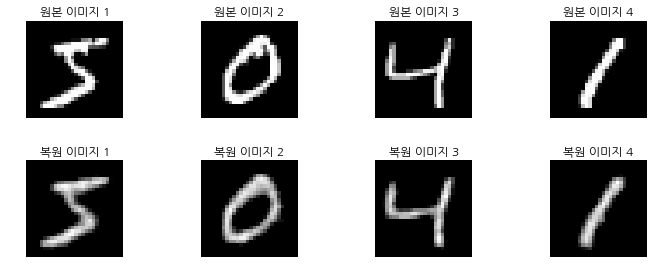

In [17]:
n = 4
x_train_recoverd = autoencoder3.predict(x_train_2d_c[:n])
plt.figure(figsize=(10, 4))
for i in range(n):
    plt.subplot(2, n, i + 1)
    plt.imshow(x_train_2d[i])
    plt.title("원본 이미지 {}".format(i + 1))
    plt.gray(); plt.axis("off")
    
    plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_train_recoverd[i, :].reshape(28, 28))
    plt.title("복원 이미지 {}".format(i + 1))
    plt.gray(); plt.axis("off")

plt.tight_layout()
plt.show()